#Week-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [3]:
data = pd.read_csv(data_url,sep=';')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
features_list = data.columns[:-1].values
labels = [data.columns[-1]]

In [6]:
features_list

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [7]:
labels

['quality']

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

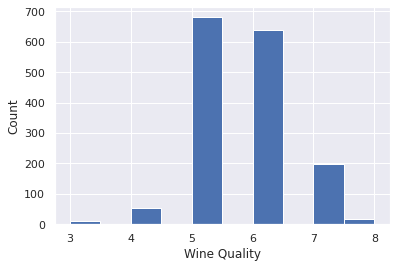

In [9]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

## Python implementation of train_test_split

In [10]:
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data))
  test_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_size]
  train_indices = shuffled_indices[test_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


## Stratified Sampling

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(data,data['quality']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

## Data Visualization

In [12]:
exploration_set=strat_train_set.copy()

### Using SNS scatterplot

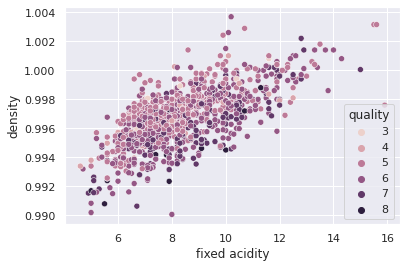

In [13]:
sns.scatterplot(data=exploration_set,x='fixed acidity',y='density',hue='quality')

### Using matplotlib plot

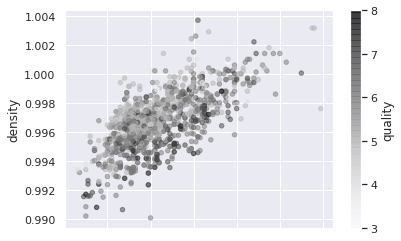

In [14]:
exploration_set.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c="quality")

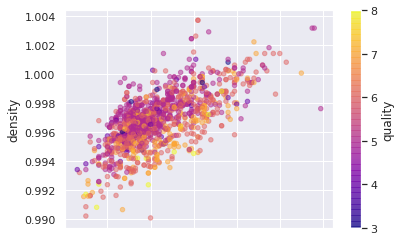

In [15]:
exploration_set.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c="quality",cmap="plasma")

In [16]:
plt.get_cmap("viridis")

### Relationship using Correlation Matrix

In [17]:
corr_matrix = exploration_set.corr()

In [18]:
corr_matrix['quality']


fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

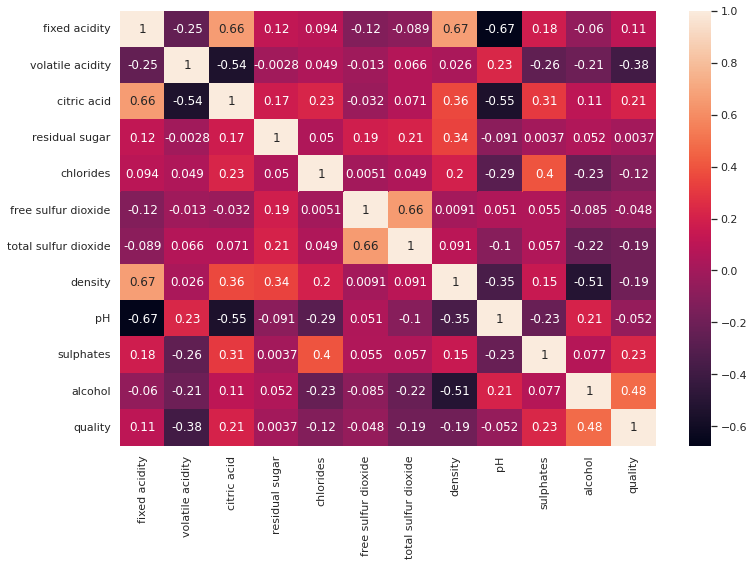

In [19]:
#Depicting corr matrix in heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_matrix,annot=True)

### Relationship using pandas scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafdc805090>,
      dtype=object)

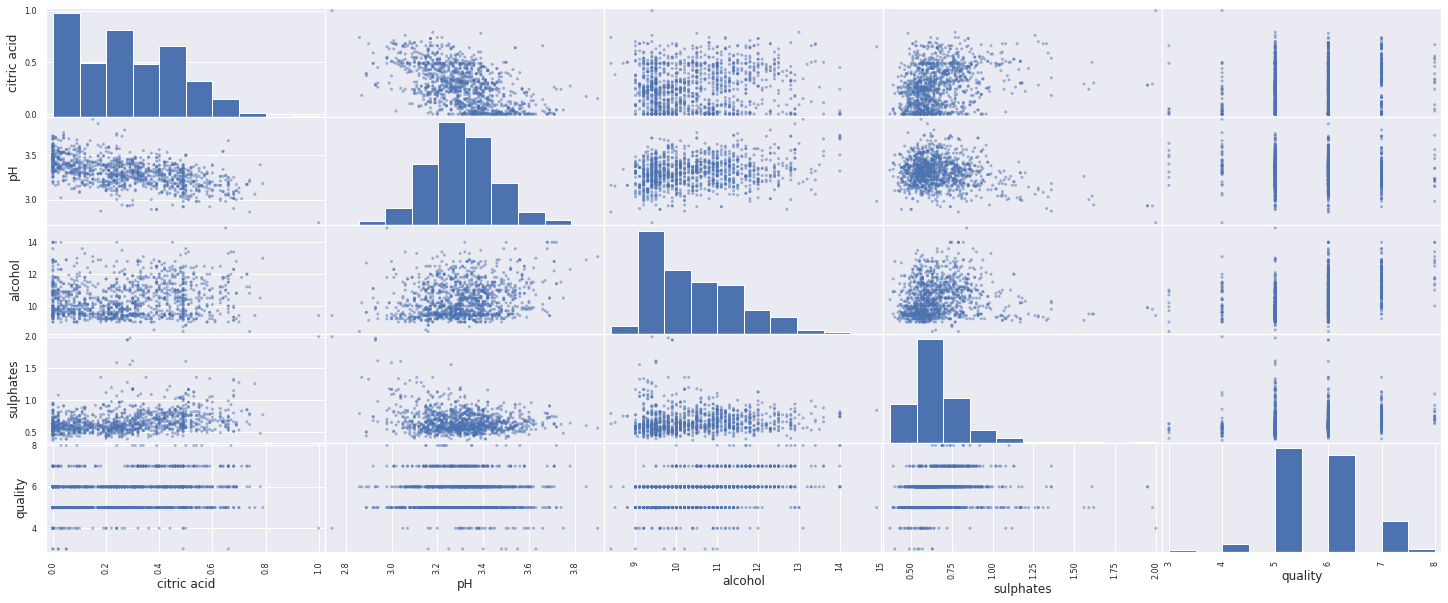

In [20]:
from pandas.plotting import scatter_matrix

attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list],figsize=(25,10))

## Data Preparation

### Separation of features and labels

In [21]:
wine_features = strat_train_set.drop('quality',axis=1)
wine_labels = strat_train_set['quality'].copy()

In [22]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### SImple Imputer

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [24]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [26]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [27]:
tr_features=imputer.transform(wine_features)
tr_features.shape

(1279, 11)

In [28]:
wine_features_tr=pd.DataFrame(tr_features,columns=wine_features.columns)

In [29]:
from sklearn.model_selection import GridSearchCV
?GridSearchCV

## Difference between loc and iloc
1. iloc is index based indexing
2. loc is label based indexing
3. index can be used in loc to indicate the row index

In [30]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


### Syntax where loc and iloc gives same result

In [31]:
print(df.iloc[2]) #returns the type Series
print(df.loc[2])

a    1000
b    2000
c    3000
d    4000
Name: 2, dtype: int64
a    1000
b    2000
c    3000
d    4000
Name: 2, dtype: int64


In [32]:
print(df.iloc[[2]],type(df.iloc[[2]])) #returns Dataframe
print(df.loc[[2]],type(df.loc[[2]]))  #returns Dataframe

      a     b     c     d
2  1000  2000  3000  4000 <class 'pandas.core.frame.DataFrame'>
      a     b     c     d
2  1000  2000  3000  4000 <class 'pandas.core.frame.DataFrame'>


### Syntax where Arguments for loc and iloc should be different

In [33]:
print(df.iloc[2,2],type(df.iloc[2,2])) #returns the type Numpy
print(df.loc[2,'c'],type(df.loc[2,'c']))

3000 <class 'numpy.int64'>
3000 <class 'numpy.int64'>


In [34]:
print(df.iloc[[2],[2]],type(df.iloc[[2],[2]]))
print(df.loc[[2],['c']],type(df.loc[[2],['c']]))

      c
2  3000 <class 'pandas.core.frame.DataFrame'>
      c
2  3000 <class 'pandas.core.frame.DataFrame'>


## Other Important Command testing

# Week-2

In [35]:
x=np.array([[5,4,np.nan],[3,4,3],[np.nan,6,np.nan],[8,8,5]])

In [36]:
from sklearn.impute import KNNImputer
knni=KNNImputer(n_neighbors=2,weights="uniform")
knni.fit_transform(x)

array([[5., 4., 4.],
       [3., 4., 3.],
       [4., 6., 4.],
       [8., 8., 5.]])

## Feature-Extraction

### DictVectorizer

In [37]:
data = [{'age':4,'height':96},{'age':3,'height':73.9},{'age':1,'height':88.9},{'age':2,'height':81.6}]

In [38]:
from sklearn.feature_extraction import DictVectorizer
dictvect = DictVectorizer()
data_transformed = dictvect.fit_transform(data)
print((data_transformed))
print(data_transformed.toarray())


  (0, 0)	4.0
  (0, 1)	96.0
  (1, 0)	3.0
  (1, 1)	73.9
  (2, 0)	1.0
  (2, 1)	88.9
  (3, 0)	2.0
  (3, 1)	81.6
[[ 4.  96. ]
 [ 3.  73.9]
 [ 1.  88.9]
 [ 2.  81.6]]


In [39]:
from sklearn.feature_extraction import DictVectorizer
dictvect = DictVectorizer(sparse=False)
data_transformed = dictvect.fit_transform(data)
print((data_transformed))


[[ 4.  96. ]
 [ 3.  73.9]
 [ 1.  88.9]
 [ 2.  81.6]]


In [40]:
def linearly_separable(x,y,epochs):
  def loss(features,labels,weight):
    z=features@weight
    y_hat = np.where(z>=0,1,-1)
    e=y_hat-labels
    return e.transpose()@e
  w= np.zeros(x.shape[1])
  state=False
  for epoch in np.arange(epochs):
    for xi, target in zip(x,y):
      w+=0.5*(target-np.where(xi@w>=0,1,-1))
    if loss(x,y,w)==0:
      state=True
  return state

## Data Imputation

In [41]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols)

In [42]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [43]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [44]:
heart_data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [45]:
heart_data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [46]:
heart_data.loc[heart_data.ca=='?','ca'].count()

4

In [47]:
heart_data.loc[heart_data.thal=='?','thal'].count()

2

In [48]:
heart_data.ca.replace('?',np.nan,inplace=True)
heart_data.thal.replace('?',np.nan,inplace=True)

In [49]:
heart_data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

##Visualization of feature distribution





In [50]:
cols= ['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=cols)

In [51]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [52]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [53]:
abalone_data.replace({'Sex':{'M':1,'F':2,'I':3}},inplace=True)

In [54]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [55]:
abalone_data.Sex.unique()

array([1, 2, 3])

In [56]:
y=abalone_data.pop('Rings')
feature_cols=abalone_data.columns

In [57]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


###KDE Plot

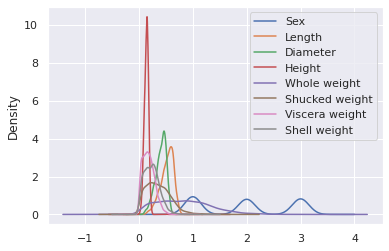

In [58]:
abalone_data.plot.kde()

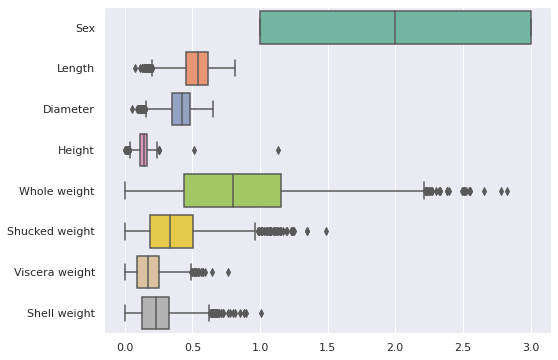

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(data=abalone_data,orient="h",palette="Set2")

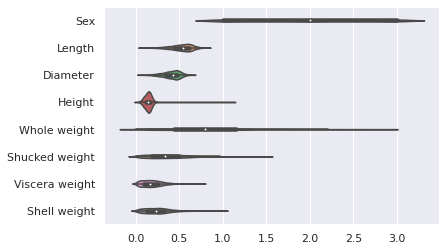

In [60]:
sns.violinplot(data=abalone_data,orient="h",pallete="Set2")

In [61]:
from sklearn.preprocessing import MinMaxScaler
mas=MinMaxScaler()
x_new=mas.fit_transform(abalone_data)
type(x_new)

numpy.ndarray

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_st=ss.fit_transform(abalone_data)
X_st

array([[-1.15434629, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [-1.15434629,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.05379815,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [-1.15434629,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [63]:
in_cols=abalone_data.columns
data=pd.DataFrame(X_st,columns=in_cols)

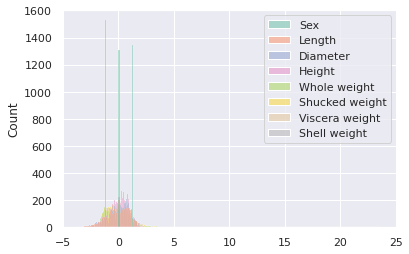

In [65]:
sns.histplot(data=data,palette="Set2")

In [66]:
X=abalone_data.to_numpy()

In [67]:
from sklearn.preprocessing import PolynomialFeatures


In [68]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [69]:
cols = ['sepal length','sepal width','petal length','petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
?OneHotEncoder

In [70]:
from sklearn.feature_selection import GenericUnivariateSelect
?GenericUnivariateSelect

In [71]:
onehotencoder = OneHotEncoder(categories = 'auto')
print('shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version,
hence reshape to (-1,1) to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))

#y.reshape(-1,1) is a 450x1 sparse matrix of type <class numpy.float64>
# with 150 stored elements in coordinate format.
#y is a 150x3 sparse matrix  with 150 stored elements in compressed sparse row format
print('Shape of y afer encoding', iris_labels.shape)

#since output is sparse use to_array() to expand it
print('First 5 labels:')
print(iris_labels.toarray()[:5])

shape of y before encoding (150,)
Shape of y afer encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
#get the class column in a new variable
iris_labels = np.array(iris_data['label'])

#encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels.reshape(-1,1))
label_integer

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
#get the class column in a new variable
iris_labels = np.array(iris_data['label'])

#encode the class names to integers
enc = LabelEncoder()
label_int=enc.fit_transform(iris_labels)
label_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_california, y_california = fetch_california_housing(return_X_y=True)

X,y = X_california[:2000,:],y_california[:2000]
print(f'Shape of feature matrix before feature selection: {X.shape}')

Shape of feature matrix before feature selection: (2000, 8)


In [98]:
skb=SelectKBest(mutual_info_regression,k=3)
X_new=skb.fit_transform(X,y)
print(skb.scores_)

X_new.shape

[0.56961504 0.06735475 0.21369618 0.09494334 0.00818476 0.02141619
 0.54082718 0.43619998]


(2000, 3)

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=3,step=1)
selector.fit_transform(X,y)

# print(selector.support_)


# print(f'Rank of each feature is: {selector.ranking_}')
selector.get_support()

array([ True, False, False, False, False, False,  True,  True])

In [99]:
from sklearn.feature_selection import SequentialFeatureSelector
?SequentialFeatureSelector

In [105]:
from sklearn.compose import ColumnTransformer

In [100]:
?ColumnTransformer

Object `ColumnTransformer` not found.


In [101]:
data=pd.read_csv("/content/drive/Othercomputers/My MacBook Air/IIT MADRAS DEGREE/Diploma/Data Science/MLP/Slides/Week 2/DataPreprocessingGraded_dataset.csv")

In [102]:
X=data[data.columns[:5]]
y=data['Target']

In [106]:
X.V1=X.V1.replace('?',np.NaN)
X.V2=X.V2.replace('?',np.NaN)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [107]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

vt = VarianceThreshold(threshold=0.1)
numerical_pipe = ColumnTransformer([('impute',SimpleImputer(strategy='mean'),[0,1,2,3])])
scale_pipe = Pipeline(steps=[('numeric',numerical_pipe),
                             ('scale',StandardScaler())])
categorical_pipe = ColumnTransformer([('cat',OrdinalEncoder(),[4])])
complete_pipe = FeatureUnion([('numeric',scale_pipe),('cat',categorical_pipe)])
pipe = Pipeline(steps = [('cp',complete_pipe),('varianceThreshold',vt)])

tr_x=pipe.fit_transform(X)
tr_x.shape

(748, 4)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
estimator=LogisticRegression()
oe=OrdinalEncoder()
tr_y = oe.fit_transform(y.values.reshape(-1,1))
rfe = RFE(estimator,n_features_to_select=2)

rfe.fit(tr_x,tr_y.reshape(-1,))
rfe.support_

array([ True, False,  True, False])

In [109]:
from sklearn.datasets import load_breast_cancer

In [110]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)

In [111]:
X.shape

(569, 30)

In [112]:
np.unique(y)

array([0, 1])

In [113]:
indx=np.where(y==0)
len(indx[0])

212

In [114]:
data=load_breast_cancer(as_frame=True)

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [116]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [117]:
x=np.array([[7,16,31],[np.nan,np.nan,66],[98,np.nan,92]])
from sklearn.impute import SimpleImputer
simpleimp = SimpleImputer(strategy="mean")
mat = simpleimp.fit_transform(x)
mat

array([[ 7. , 16. , 31. ],
       [52.5, 16. , 66. ],
       [98. , 16. , 92. ]])

In [118]:
from sklearn.preprocessing import FunctionTransformer
x=np.array([[1, 1], [2, 3],[10,100]])
ft= FunctionTransformer(np.log10)
y=ft.fit_transform(x)

In [119]:
y

array([[0.        , 0.        ],
       [0.30103   , 0.47712125],
       [1.        , 2.        ]])

In [120]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width','label']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=columns)

In [121]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [122]:
X=df[columns[:-1]]
y=df['label']

In [123]:
X.shape

(150, 4)

In [124]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=2)
X_trans = pl.fit_transform(X)

In [125]:
X_trans.shape

(150, 15)

In [126]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)

In [127]:
X.shape[0]

20640

In [128]:
train_ratio=0.8
train_size = int(train_ratio*X.shape[0])

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]


In [129]:
X_train.shape

(16512, 8)

In [130]:
from sklearn.dummy import DummyRegressor
dm = DummyRegressor(strategy="mean")
dm.fit(X_train,y_train)

DummyRegressor()

In [131]:
from sklearn.metrics import r2_score
dm.predict(X_test)
dm.score(X_test,y_test)

-0.0393444964686247

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
lin_reg_cv = cross_val_score(lin_reg,X_train,y_train,cv=5,scoring="neg_mean_absolute_error")

In [133]:
lin_reg_cv

array([-0.60405573, -0.61260842, -0.56934218, -0.4720059 , -0.60906765])

In [ ]:
rfe.support_

In [ ]:
rfe.ranking_

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

In [ ]:
reg.score(X_test,y_test)